<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>February 20, 2018: collecting from dedicated nbs
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions: <i>Jordan normal forms</i>.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t

init_printing()

In [2]:
%run ../../src/matrix_functions.py

In [3]:
alpha, beta = IndexedBase(r'\alpha'), IndexedBase(r'\beta')
m=8
Iexp = Matrix(m, m, lambda n, k: factorial(n) if n==k else 0)

---

# Fibonacci generation matrix

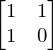

In [4]:
F = Matrix([
        [1, 1],
        [1, 0],
    ])
F

In [5]:
m=2
data, eigenvals, multiplicities = eigendata = eigen_data(F)
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_polynomials = component_polynomials(Phi_poly, eigendata)
cmatrices = component_matrices(F, Phi_polynomials)

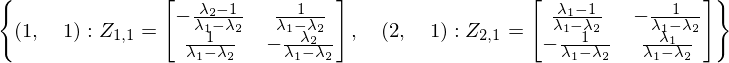

In [6]:
cmatrices

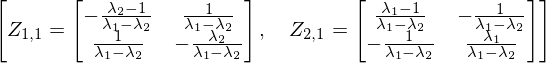

In [7]:
list(cmatrices.values()) # pretty print

In [8]:
M_space_ctor = M_space(cmatrices)
v_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_v = M_space_ctor(v_vector)

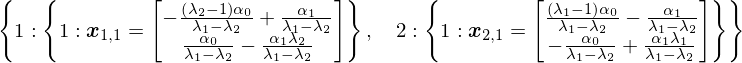

In [9]:
M_space_v

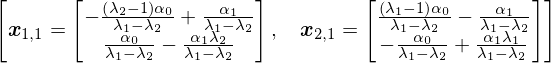

In [10]:
[eq for i, xs in M_space_v.items() for eq in xs.values()] # pretty print

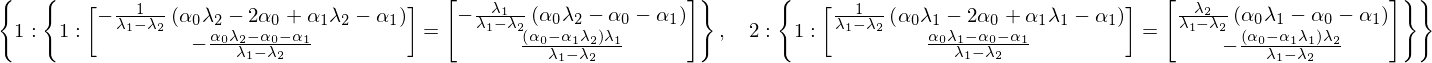

In [11]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(F, M_space_v,post=lambda i: i.radsimp().factor())
eqs

In [12]:
miniblocks = Jordan_blocks(eigendata)
X, J = Jordan_normalform(eigendata, matrices=(F, M_space_v, miniblocks))
X_lambda = Lambda(v_vector, X.rhs)

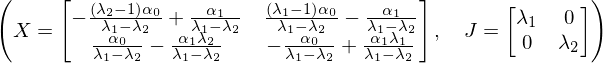

In [13]:
X, J

In [14]:
# FX=XJ
assert ((F*X.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X.rhs*J.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

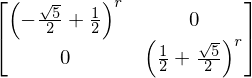

In [15]:
J_pow = Matrix([[lamda_indexed[1]**r, 0],[0, lamda_indexed[2]**r],]).subs(eigenvals)
J_pow

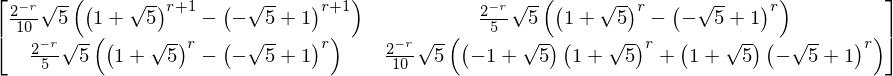

In [16]:
F_pow_r = (F**r).applyfunc(simplify)
F_pow_r

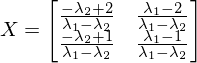

In [17]:
Eq(X.lhs, X.rhs.subs({alpha[0]:1, alpha[1]:1}).applyfunc(simplify), evaluate=False)

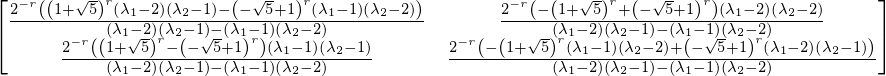

In [18]:
X_Jpow_Xinv = (X.rhs*J_pow*X.rhs**(-1)).subs({alpha[0]:1, alpha[1]:1}).applyfunc(simplify)
X_Jpow_Xinv

In [136]:
# assert F_pow_r.applyfunc(factor) == X_Jpow_Xinv # too general

In [137]:
assert F_pow_r.subs({r:10}).applyfunc(simplify) == (X.rhs*J_pow*X.rhs**(-1)).subs(eigenvals).subs({alpha[0]:1, alpha[1]:t, r:10}).applyfunc(simplify)

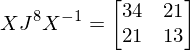

In [28]:
Xsym, Jsym = MatrixSymbol('X',m,m), MatrixSymbol('J',m,m)
Eq(Xsym * Jsym**8 * Xsym**(-1), X_Jpow_Xinv.subs(eigenvals).subs({r:8}).simplify(), evaluate=False)

# $\mathcal{J}$

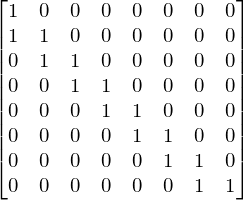

In [4]:
m=8
J = Matrix(m, m, lambda n, k: 1 if n==k or n==k+1 else 0)
J

In [5]:
data, eigenvals, multiplicities = eigendata = eigen_data(J)
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_polynomials = component_polynomials_riordan(degree=m)
cmatrices = component_matrices(J, Phi_polynomials)

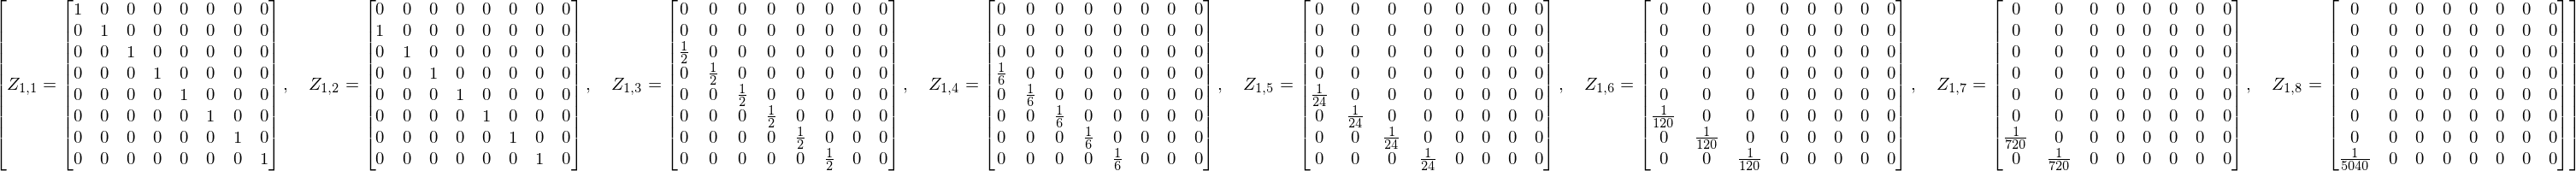

In [6]:
list(cmatrices.values()) # pretty print

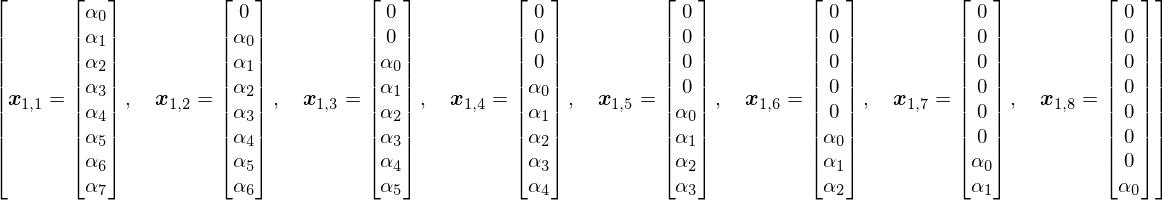

In [7]:
M_space_ctor = M_space(cmatrices)
v_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_v = M_space_ctor(v_vector)
[eq for i, xs in M_space_v.items() for eq in xs.values()] # pretty print

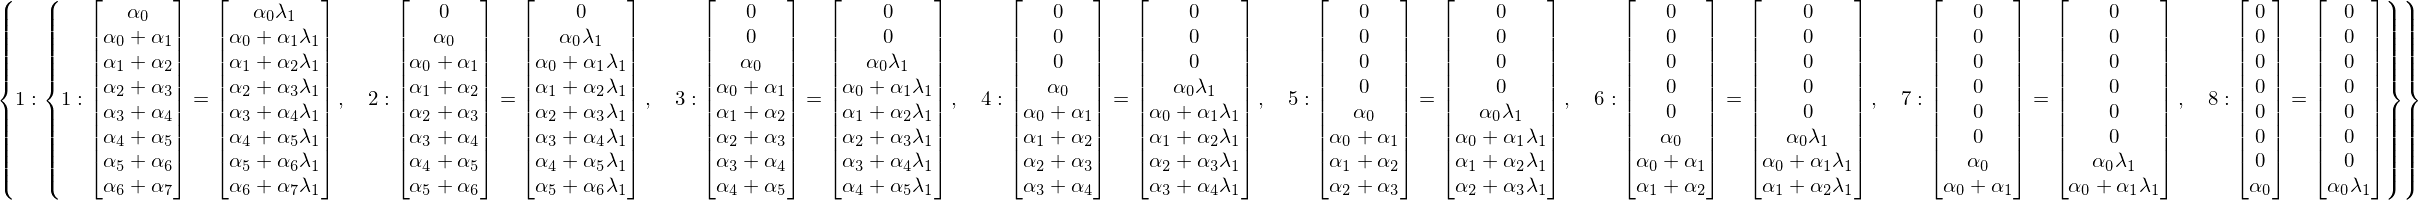

In [8]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(J, M_space_v)#,post=lambda i: i.radsimp().factor())
eqs

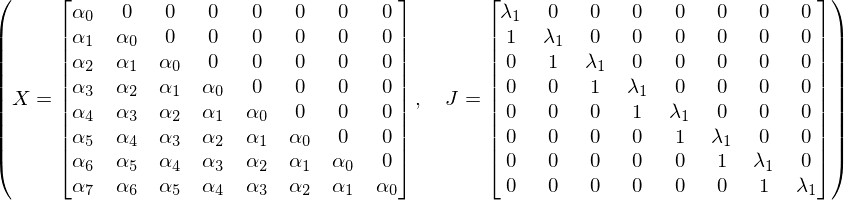

In [9]:
miniblocks = Jordan_blocks(eigendata)
X, JJ = Jordan_normalform(eigendata, matrices=(J, M_space_v, miniblocks))
X_lambda = Lambda(v_vector, X.rhs)
X, JJ

In [10]:
f = Function('f')
f_abstract = Eq(f(t), f(t), evaluate=False)
f_abstract

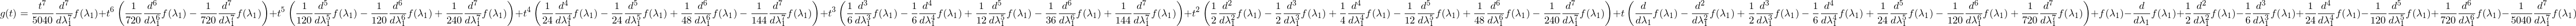

In [11]:
g_abstract = g_poly(f_abstract, eigendata, Phi_polynomials)
g_abstract

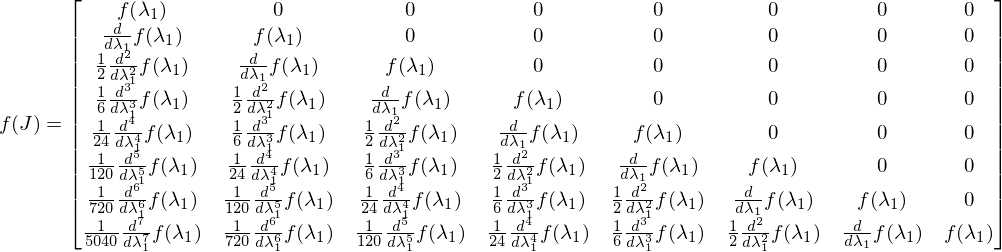

In [12]:
Jsym, e_sym = symbols('J'), IndexedBase(r'\boldsymbol{e}')
with lift_to_matrix_function(g_abstract) as G_abstract:
    J_abstract = G_abstract(J)
Eq(f(Jsym), J_abstract, evaluate=False)#.applyfunc(lambda i: i.subs(eigenvals).doit().factor())

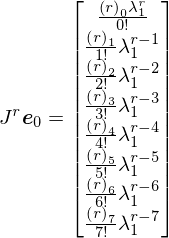

In [13]:
J_pow = J_abstract.subs({f:Lambda(x, x**r)}).applyfunc(lambda i: i.doit().factor().powsimp())
J_pow_first_col_ff = Matrix(m, 1, lambda n, _: lamda_indexed[1]**(r-n) * ff(r, n, evaluate=False) / factorial(n, evaluate=False))
assert J_pow[:,0] == J_pow_first_col_ff.doit()
Eq(Jsym**r * e_sym[0], J_pow_first_col_ff, evaluate=False)

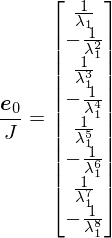

In [14]:
J_inverse = J_abstract.subs({f:Lambda(x, 1/x)}).applyfunc(lambda i: i.doit().factor())
Eq(Jsym**(-1) * e_sym[0], J_inverse[:,0],evaluate=False)

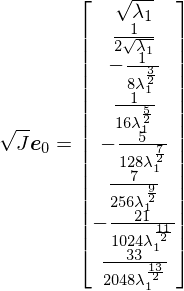

In [15]:
J_sqrt = J_abstract.subs({f:Lambda(x, sqrt(x))}).applyfunc(lambda i: i.doit())
Eq(sqrt(Jsym)*e_sym[0], J_sqrt[:,0], evaluate=False)

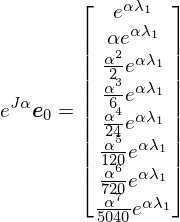

In [16]:
J_exp = J_abstract.subs({f:Lambda(x, exp(Symbol(r'\alpha')*x))}).applyfunc(lambda i: i.doit())
Eq(exp(alpha*Jsym)*e_sym[0] ,J_exp[:,0],evaluate=False)

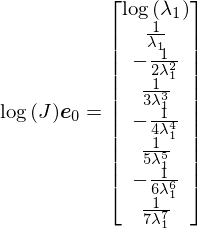

In [17]:
J_log = J_abstract.subs({f:Lambda(x, log(x))}).applyfunc(lambda i: i.doit())
Eq(log(Jsym)*e_sym[0], J_log[:,0], evaluate=False)

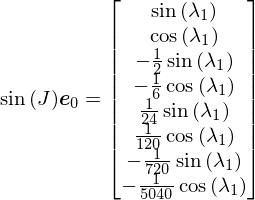

In [18]:
J_sin = J_abstract.subs({f:Lambda(x, sin(x))}).applyfunc(lambda i: i.doit())
Eq(sin(Jsym)*e_sym[0], J_sin[:,0],evaluate=False)

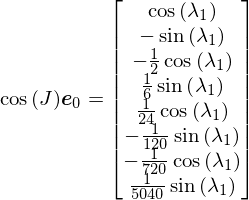

In [19]:
J_cos = J_abstract.subs({f:Lambda(x, cos(x))}).applyfunc(lambda i: i.doit())
Eq(cos(Jsym)*e_sym[0], J_cos[:,0],evaluate=False)

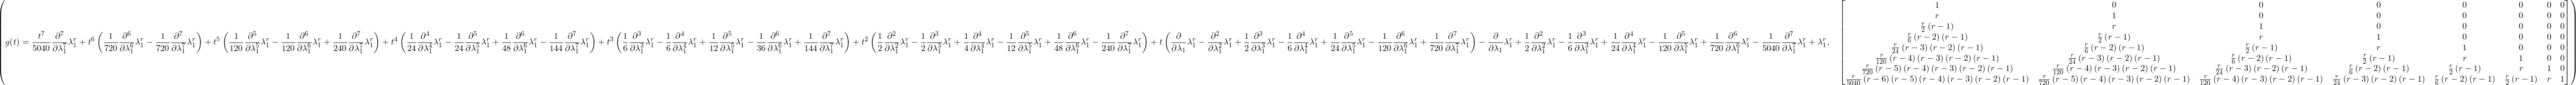

In [24]:
# previous cells can be computed using the poly g as well
g_pow = g_abstract.subs({f:Lambda(x, x**r)})#.simplify()
with lift_to_matrix_function(g_pow) as G_pow:
    J_pow = G_pow(J)
g_pow, J_pow.applyfunc(lambda i: i.subs(eigenvals).doit().factor())

# $\mathcal{P}$

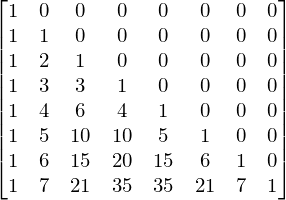

In [20]:
m=8
P = Matrix(m,m,binomial)
P

In [21]:
data, eigenvals, multiplicities = eigendata = eigen_data(P)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(P, Phi_polynomials)

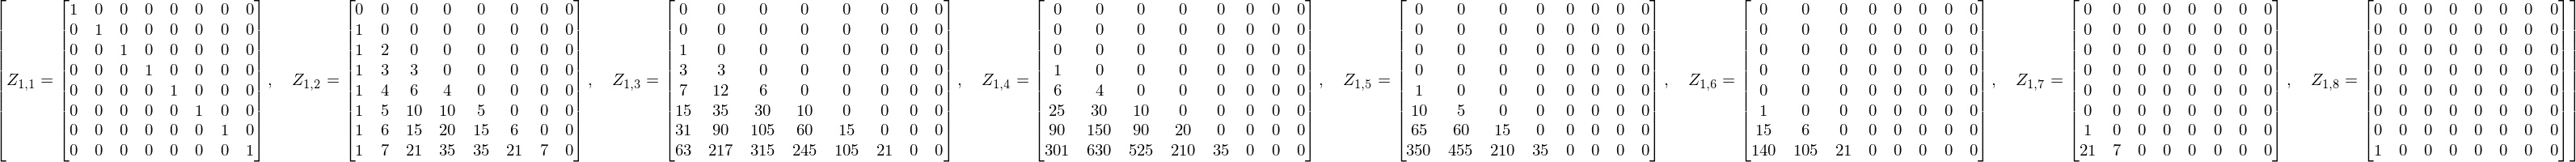

In [22]:
list(cmatrices.values()) # pretty print

In [23]:
alpha_vector = Matrix(m, 1, lambda i, _: alpha[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(alpha_vector)

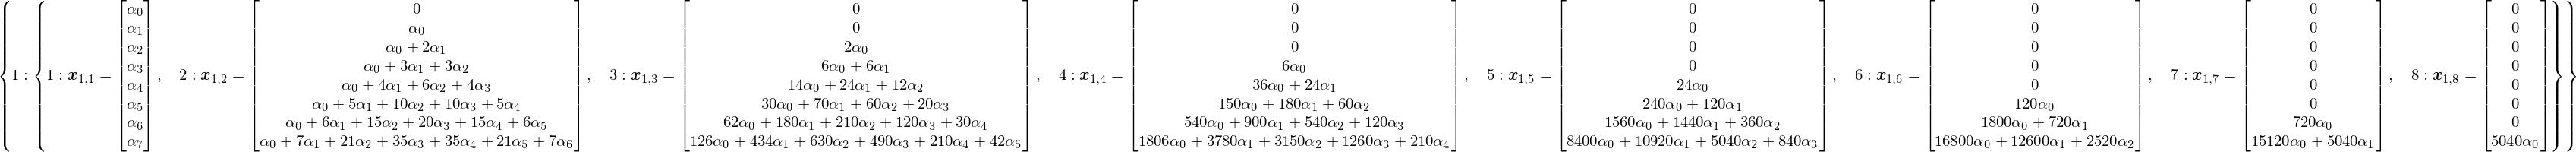

In [24]:
M_space_v

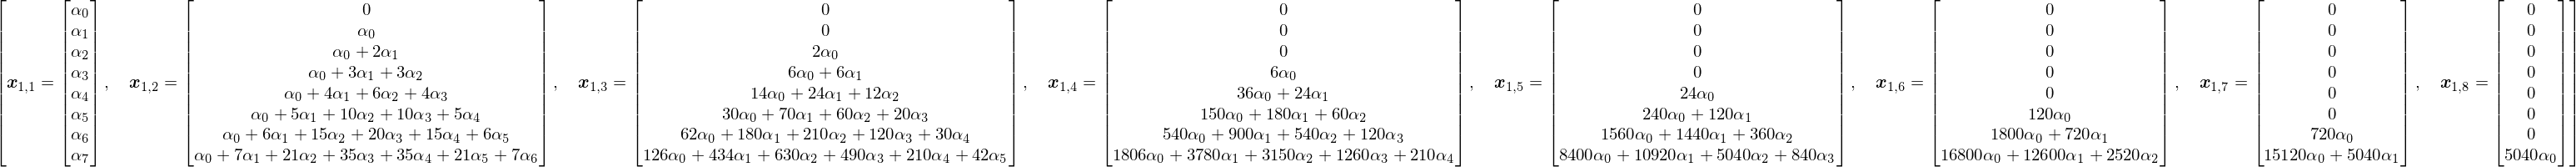

In [25]:
[eq for i, xs in M_space_v.items() for eq in xs.values()] # pretty print

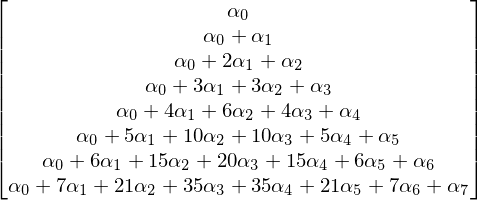

In [31]:
P*alpha_vector

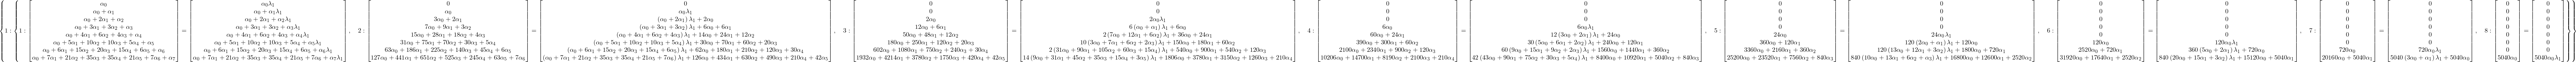

In [26]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(P, M_space_v)
eqs

In [27]:
miniblocks = Jordan_blocks(eigendata)
X_P, J_P = Jordan_normalform(eigendata, matrices=(P, M_space_v, miniblocks))
X_P_lambda = Lambda(alpha_vector, X_P.rhs)

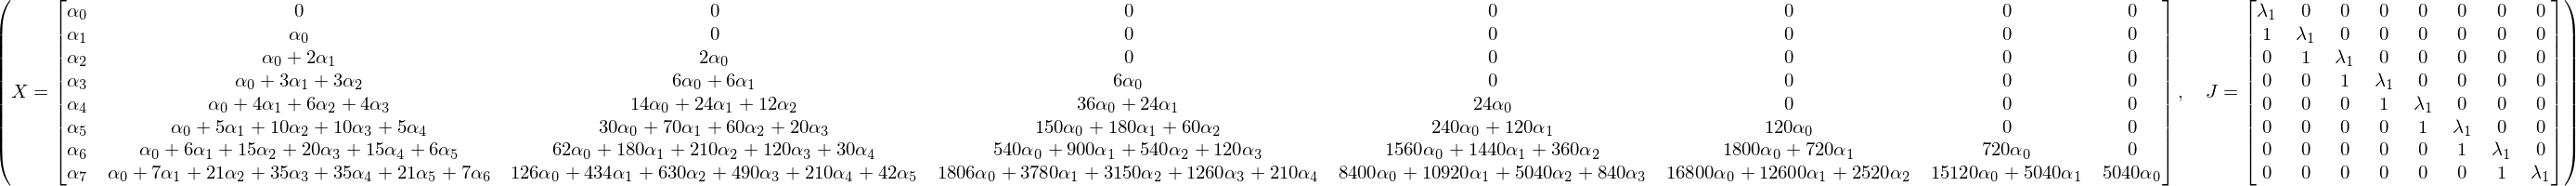

In [29]:
X_P, J_P

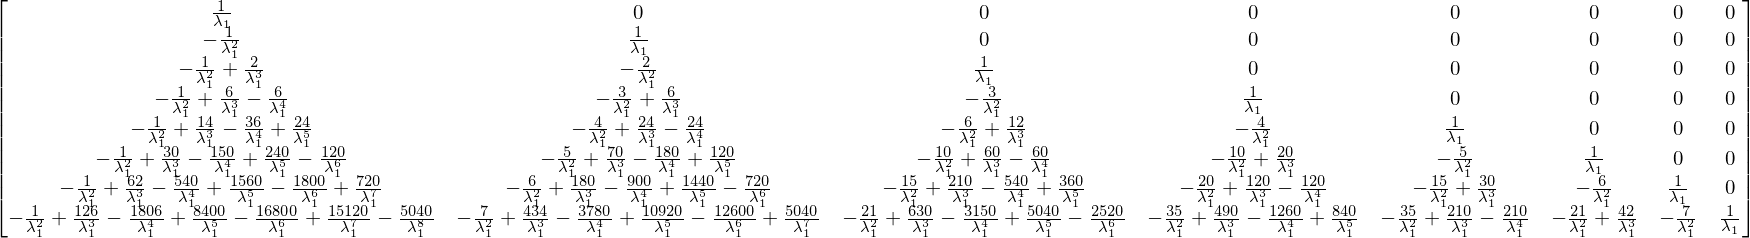

In [30]:
P_inverse_sim =  (X_P.rhs * J_inverse * X_P.rhs**(-1)).applyfunc(lambda i: i.simplify().expand())
P_inverse_sim

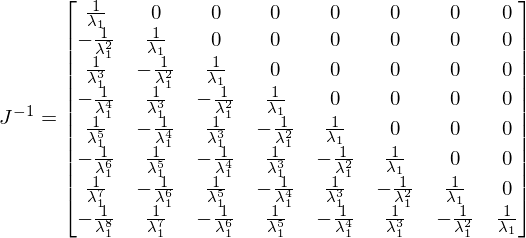

In [44]:
Eq(symbols(r'J^{-1}'), J_inverse, evaluate=False)

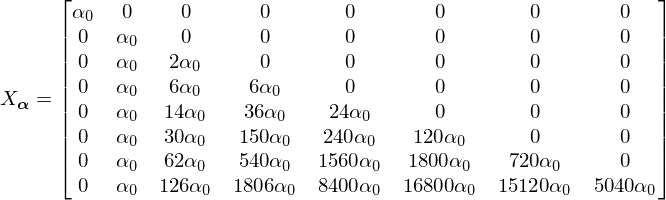

In [43]:
X_P_lamda0 = X_P_lambda(*([alpha[0]]+[0]*(m-1)))
Eq(symbols(r'X_{\boldsymbol{\alpha}}'), X_P_lamda0, evaluate=False)

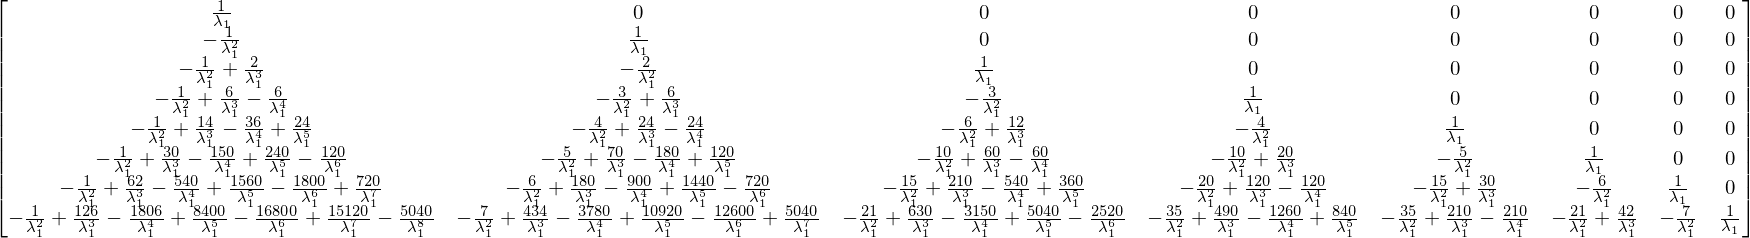

In [40]:
(X_P_lamda0 * J_inverse * X_P_lamda0**(-1)).expand()

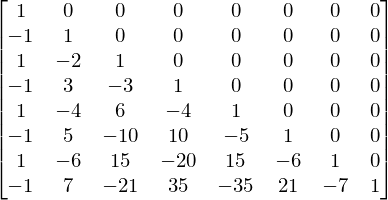

In [50]:
P_inverse_sim.subs(eigenvals)

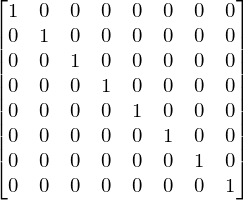

In [52]:
P*P_inverse_sim.subs(eigenvals)

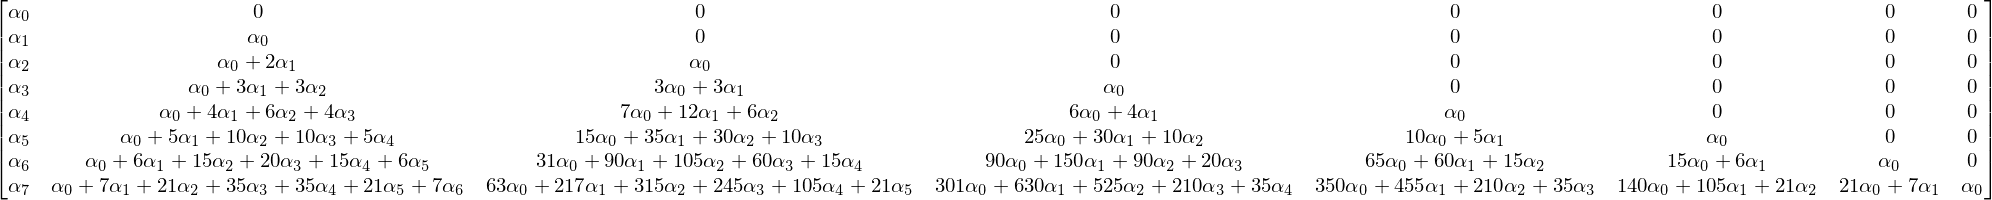

In [19]:
X_P.rhs * Iexp**(-1)

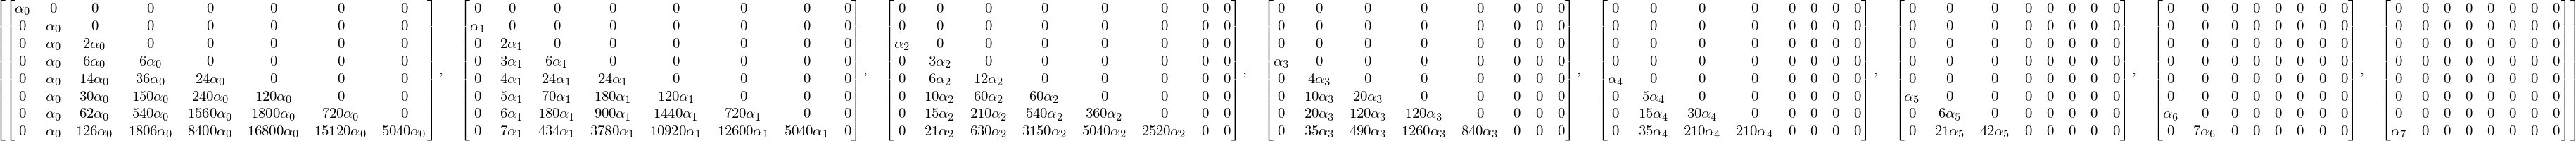

In [21]:
X_P_split = split_X_matrix(X_P.rhs, alpha_vector, factor=False)
X_P_split

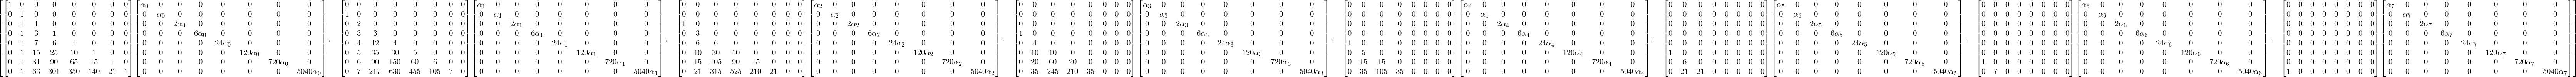

In [22]:
X_P_split = split_X_matrix(X_P.rhs, alpha_vector, factor=True)
X_P_split

In [159]:
inspect(X_split[1].args[1][1:,:-1]*((Iexp**(-1))[1:,1:]))

NameError: name 'M' is not defined

In [23]:
inspect(X_P.rhs)

nature(is_ordinary=False, is_exponential=False)

In [45]:
inspect((X_P.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=True)

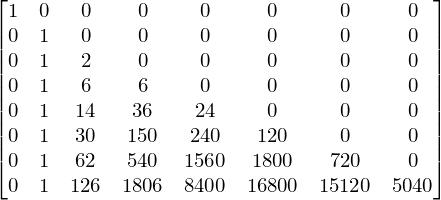

In [43]:
selection = [1] + ([0]*(m-1))
X_P_1_0s = X_P_lambda(*selection)# * Iexp**(-1)
X_P_1_0s

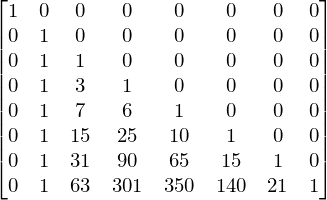

In [63]:
X_P_1_0s*Iexp**(-1)

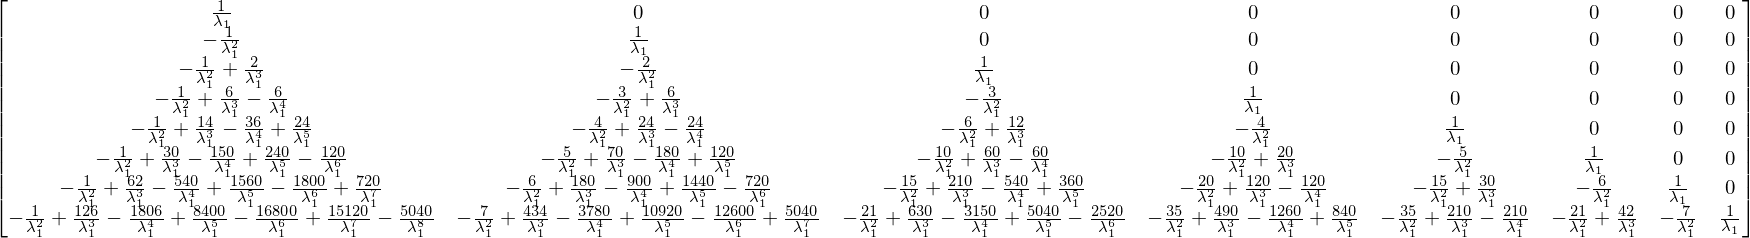

In [60]:
X_P_1_0s * J_inverse * X_P_1_0s**(-1)

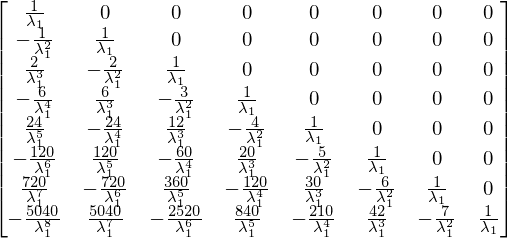

In [66]:
(Iexp * J_abstract * Iexp**(-1)).subs({f:Lambda(x, 1/x)}).doit()

In [67]:
inspect(_)

nature(is_ordinary=False, is_exponential=True)

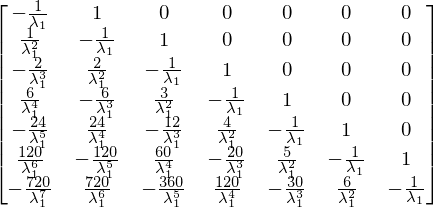

In [65]:
production_matrix(_)

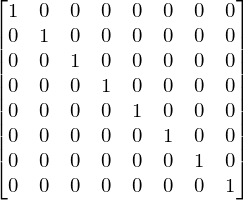

In [56]:
Iexp * Matrix(m, m, identity_matrix()) * Iexp**(-1)

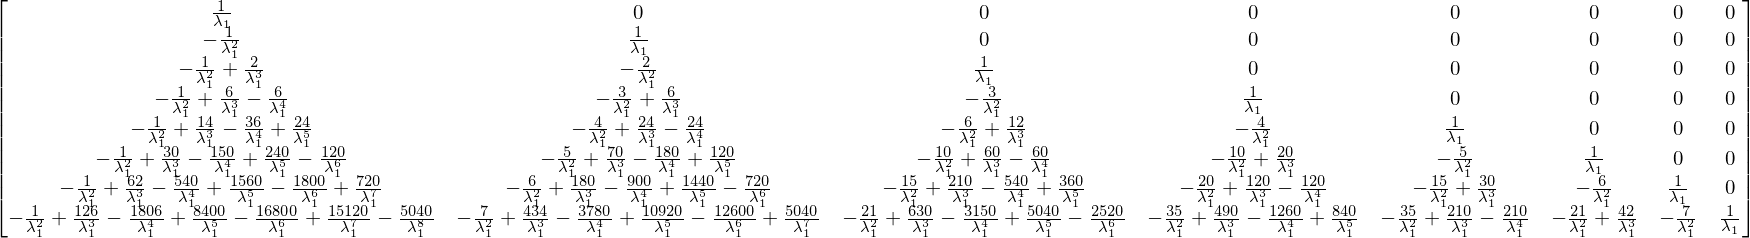

In [46]:
(X_P_1_0s * J_inverse * X_P_1_0s**(-1))

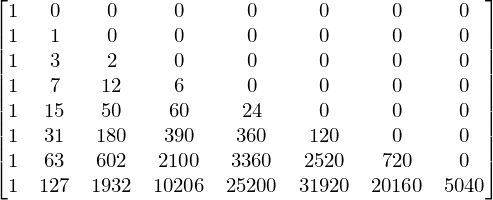

In [47]:
selection = [1] * m
X_P_1s = X_P_lambda(*selection) #* Iexp**(-1)
X_P_1s

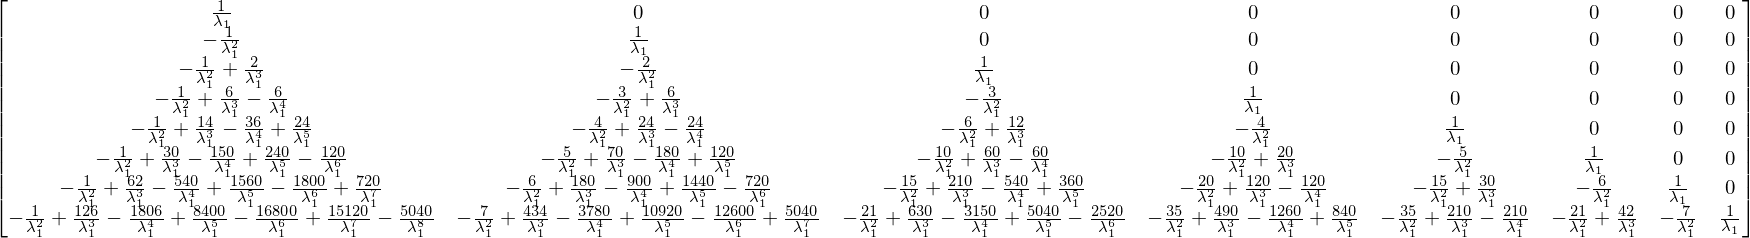

In [48]:
(X_P_1s * J_inverse * X_P_1s**(-1))

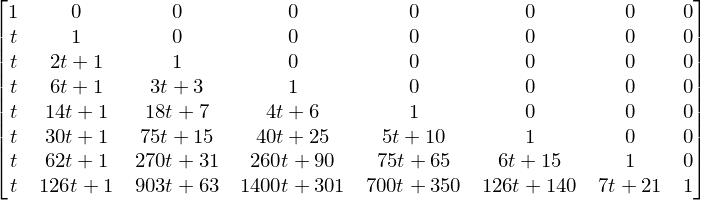

In [66]:
selection = [1] + ([t]*(m-1))
X_P_lambda(*selection) * Iexp**(-1)

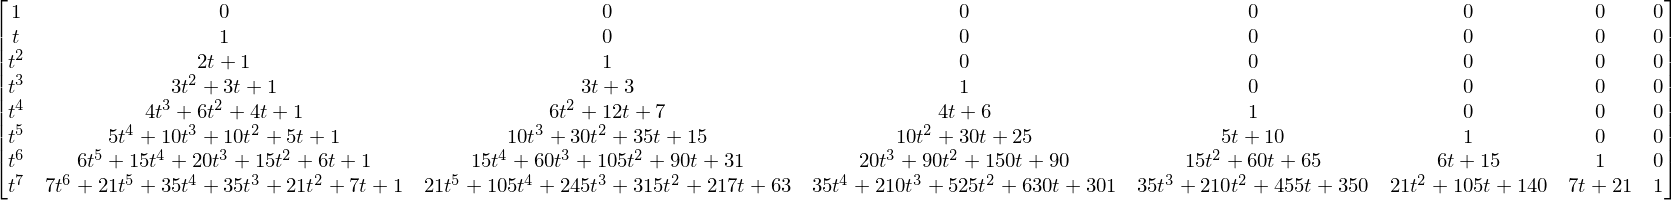

In [84]:
selection = [t**i for i in range(m)]
X_P_lambda(*selection) * Iexp**(-1)

In [51]:
# FX=XJ
assert ((P*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

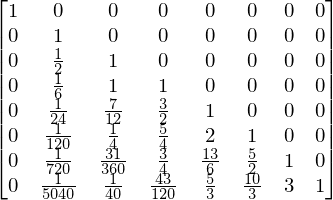

In [114]:
Matrix(m, m, riordan_matrix_by_convolution(Eq(Function('d')(t), 1), 
                                           Eq(Function('h')(t), (exp(t)-1).series(t, n=m).removeO())))

# $\mathcal{C}$

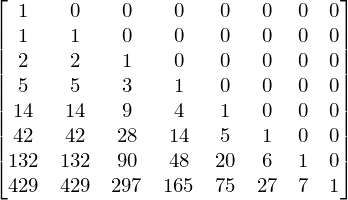

In [45]:
m = 8
A = Eq(Function('A')(t), 1/(1-t))
C = Matrix(m, m, riordan_matrix_by_AZ_sequences(m, (A, A)))
C

In [46]:
data, eigenvals, multiplicities = eigendata = eigen_data(C)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(C, Phi_polynomials)

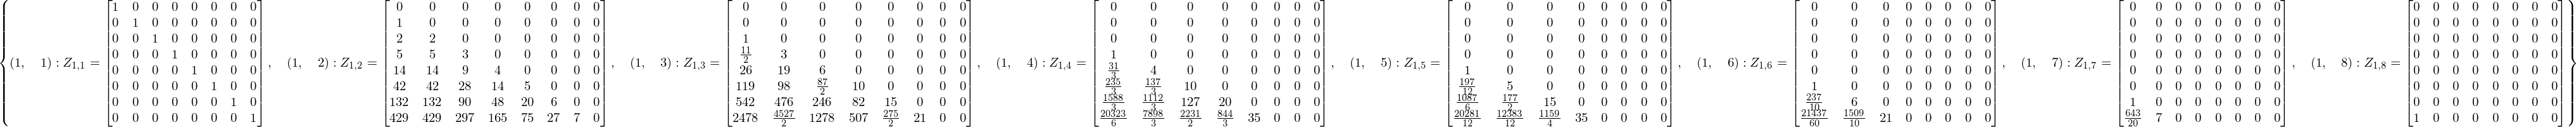

In [47]:
cmatrices

In [48]:
beta_vector = Matrix(m, 1, lambda i, _: beta[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(beta_vector)

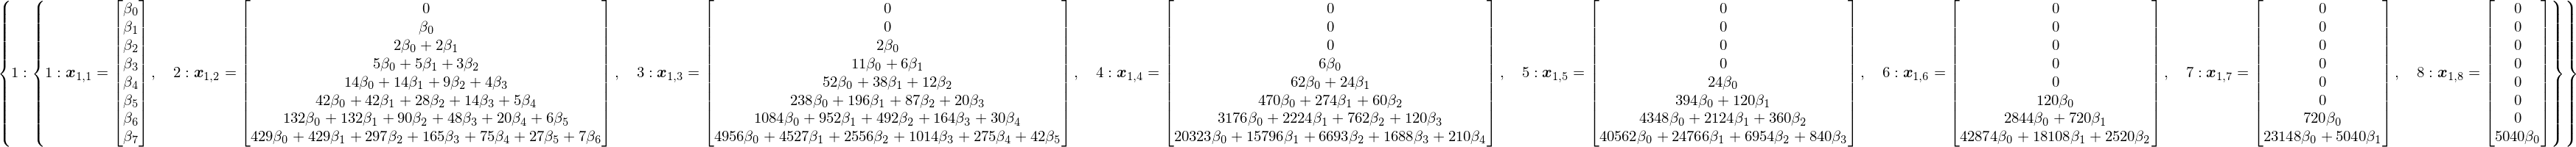

In [49]:
M_space_v

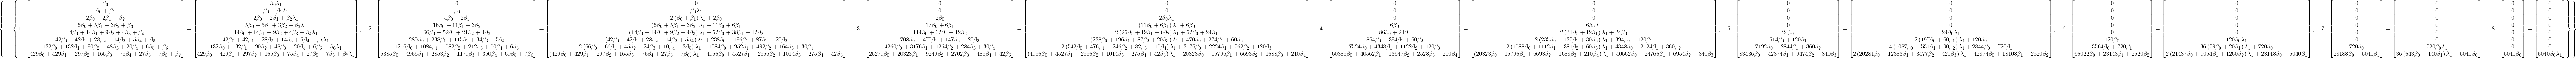

In [50]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(C, M_space_v)
eqs

In [51]:
miniblocks = Jordan_blocks(eigendata)
X_C, J_C = Jordan_normalform(eigendata, matrices=(C, M_space_v, miniblocks))
X_C_lambda = Lambda(beta_vector, X_C.rhs)

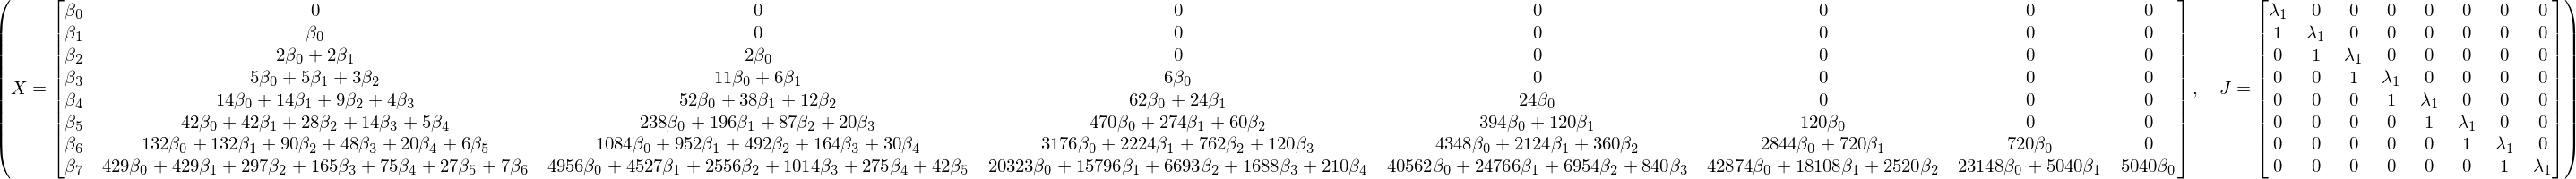

In [52]:
X_C, J_C

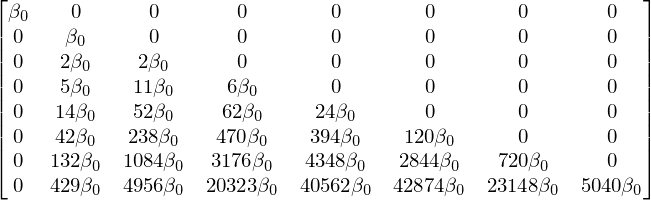

In [57]:
X_C_beta0 = X_C_lambda(*([beta[0]]+([0]*(m-1))))
X_C_beta0

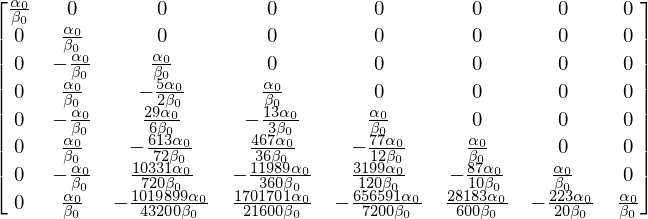

In [58]:
X_C_inverse = X_C_beta0**(-1)
XY_P_C = X_P_lamda0 * X_C_inverse
XY_P_C

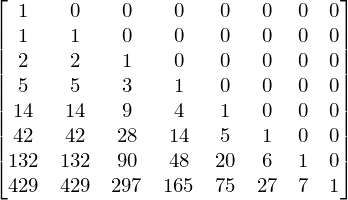

In [59]:
XY_P_C**(-1) * P * XY_P_C

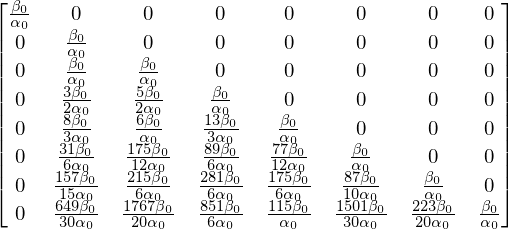

In [60]:
YX_C_P = X_C_beta0 * X_P_lamda0**(-1)
YX_C_P

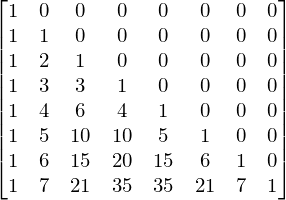

In [61]:
YX_C_P**(-1)*C*YX_C_P

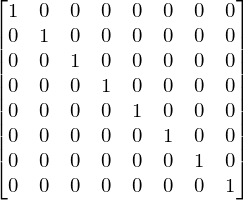

In [63]:
XY_P_C * YX_C_P

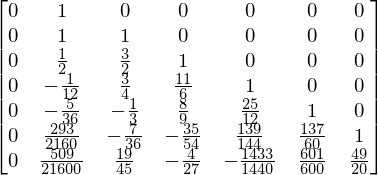

In [62]:
production_matrix(YX_C_P)

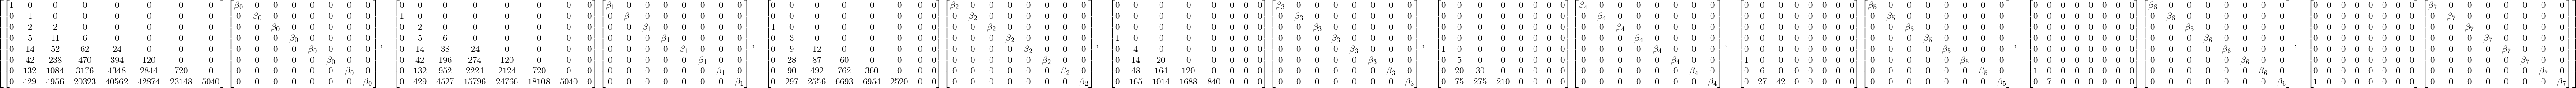

In [54]:
X_C_split = split_X_matrix(X_C.rhs, beta_vector, factor=True)
X_C_split

In [119]:
inspect(X_C_split[1].args[1][1:,:-1]*((Iexp**(-1))[1:,1:]))

nature(is_ordinary=False, is_exponential=False)

In [46]:
inspect(X_C.rhs)

TypeError: can't convert symbols to int

In [120]:
inspect((X_C.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=False)

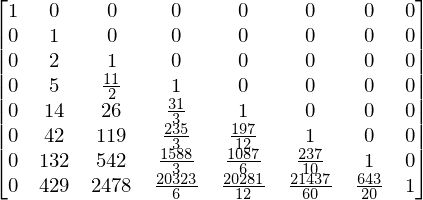

In [81]:
selection = [1] + ([0]*(m-1))
X_C_lambda(*selection) * Iexp**(-1)

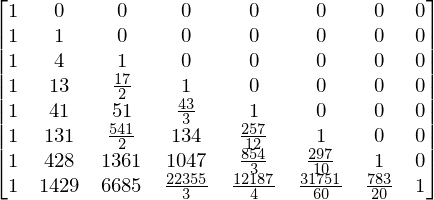

In [125]:
selection = [1] * m
X_C_lambda(*selection) * Iexp**(-1)

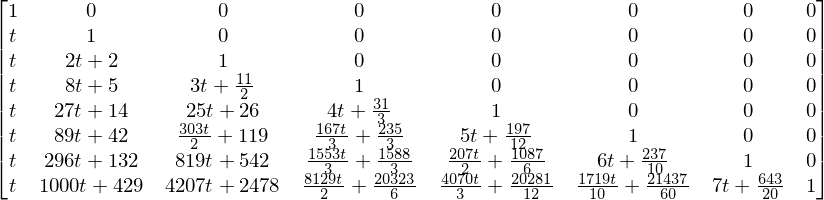

In [126]:
selection = [1] + ([t]*(m-1))
X_C_lambda(*selection) * Iexp**(-1)

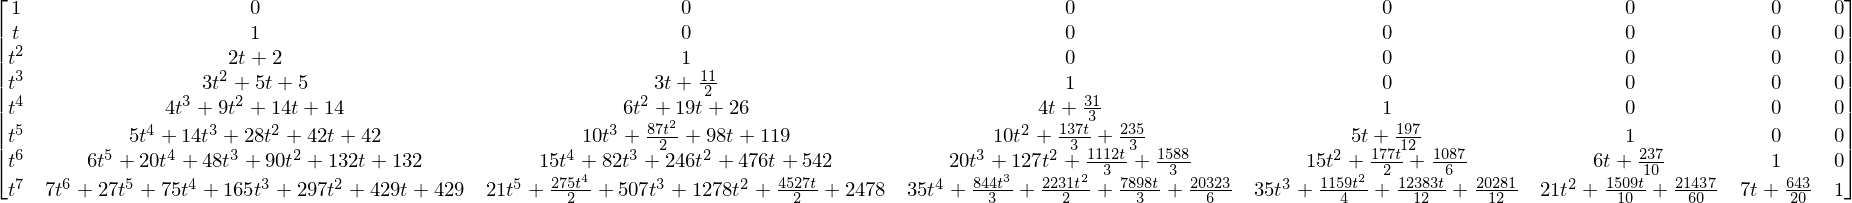

In [127]:
selection = [t**i for i in range(m)]
X_C_lambda(*selection) * Iexp**(-1)

In [65]:
# FX=XJ
assert ((C*X_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_C.rhs*J_C.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

# $\mathcal{S}$

In [24]:
from sympy.functions.combinatorial.numbers import stirling

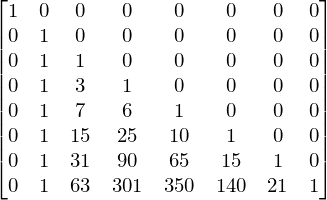

In [47]:
m=8
S2 = Matrix(m, m, lambda n,k: stirling(n,k, kind=2))
S2

In [48]:
data, eigenvals, multiplicities = eigendata = eigen_data(S2)
Phi_poly = Phi_poly_ctor(deg=m-1)
#Phi_polynomials = component_polynomials(Phi_poly, eigendata)
Phi_polynomials = component_polynomials_riordan(m)
cmatrices = component_matrices(S2, Phi_polynomials)

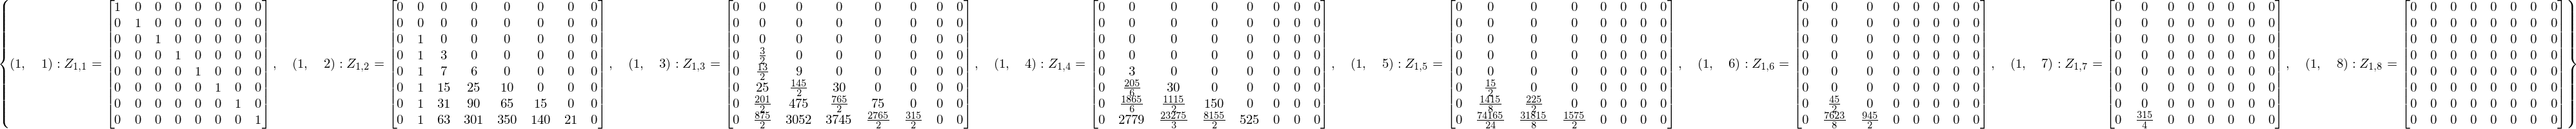

In [49]:
cmatrices

In [50]:
gamma = IndexedBase(r'\gamma')
gamma_vector = Matrix(m, 1, lambda i, _: gamma[i])
M_space_ctor = M_space(cmatrices)
M_space_v = M_space_ctor(gamma_vector)

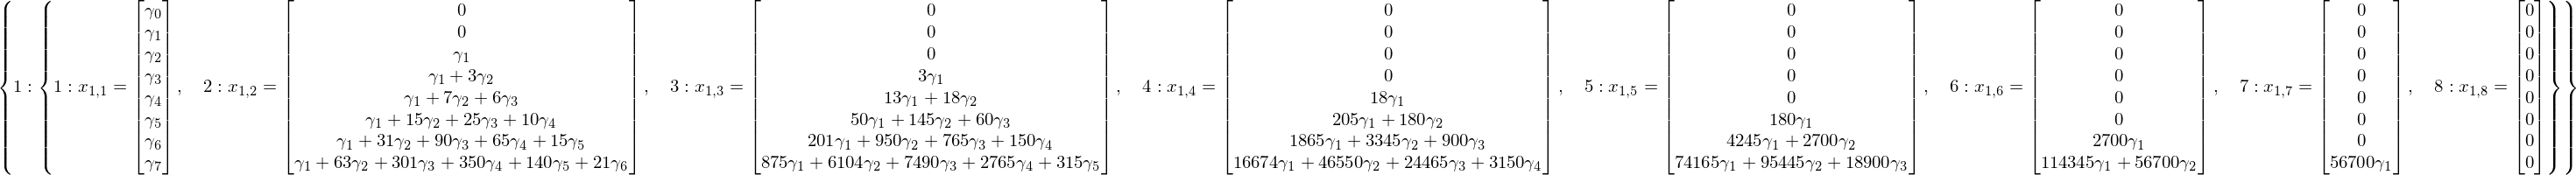

In [51]:
M_space_v

In [33]:
%run ../../src/matrix_functions.py

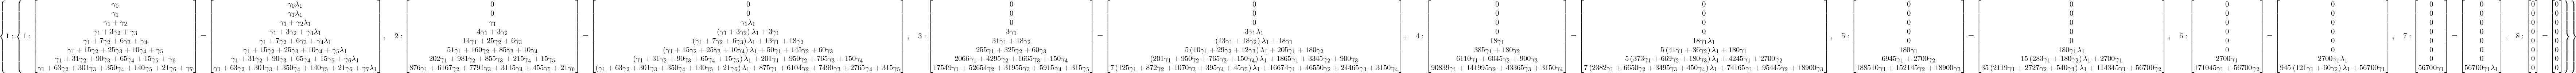

In [52]:
relations = generalized_eigenvectors_relations(eigendata)
eqs = relations(S2, M_space_v, check=True)
eqs

In [53]:
miniblocks = Jordan_blocks(eigendata)
X_S2, J_S2 = Jordan_normalform(eigendata, matrices=(S2, M_space_v, miniblocks))
X_S2_lambda = Lambda(gamma_vector, X_S2.rhs)

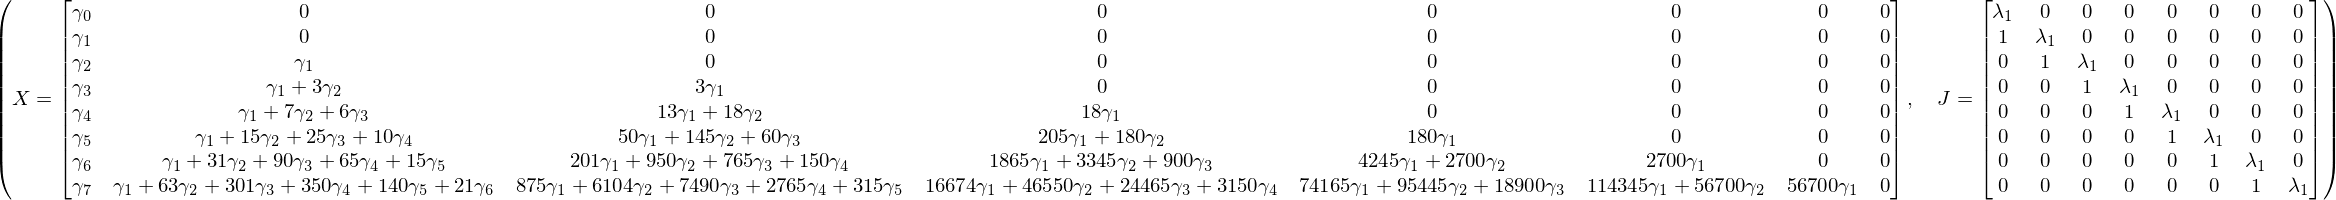

In [54]:
X_S2, J_S2

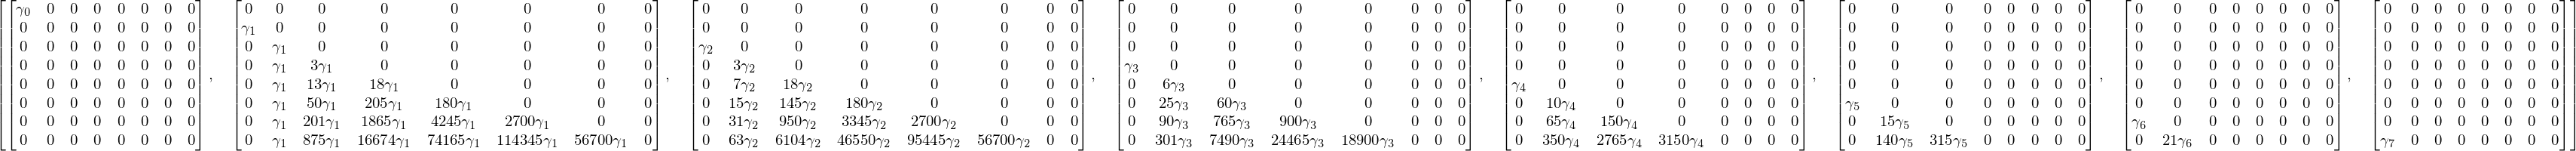

In [55]:
X_S2_split = split_X_matrix(X_S2.rhs, gamma_vector, factor=False)
X_S2_split

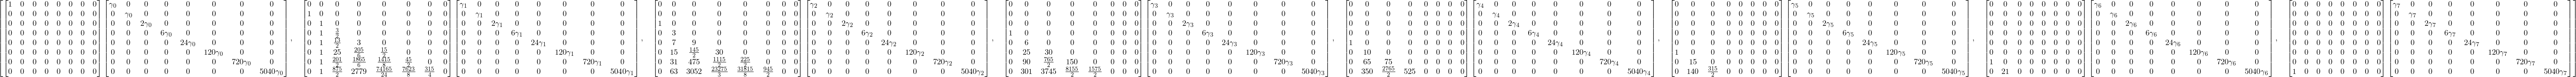

In [56]:
X_S2_split = split_X_matrix(X_S2.rhs, gamma_vector, factor=True)
X_S2_split

In [23]:
inspect(X_P.rhs)

nature(is_ordinary=False, is_exponential=False)

In [45]:
inspect((X_P.rhs * Iexp**(-1))[:5, :5])

nature(is_ordinary=False, is_exponential=True)

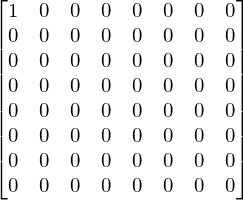

In [60]:
selection = [1] + ([0]*(m-1))
X_S2_lambda(*selection) * Iexp**(-1)

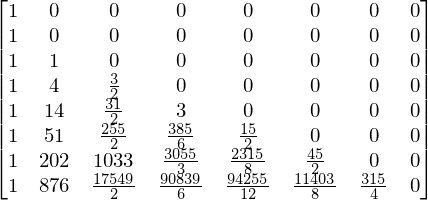

In [61]:
selection = [1] * m
X_S2_lambda(*selection) * Iexp**(-1)

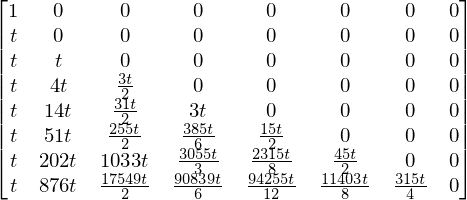

In [62]:
selection = [1] + ([t]*(m-1))
X_S2_lambda(*selection) * Iexp**(-1)

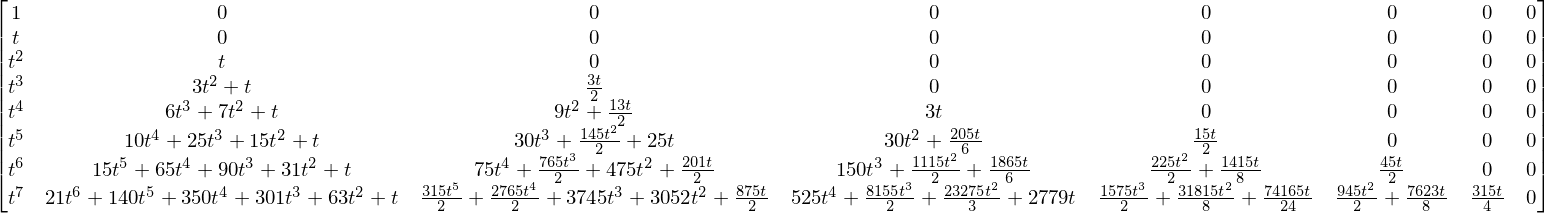

In [63]:
selection = [t**i for i in range(m)]
X_S2_lambda(*selection) * Iexp**(-1)

In [51]:
# FX=XJ
assert ((P*X_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand())==
        (X_P.rhs*J_P.rhs).applyfunc(lambda i: i.subs(eigenvals).radsimp().expand()))

---

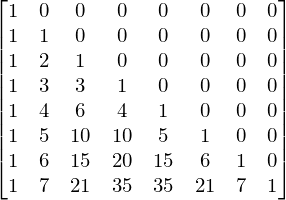

In [128]:
(X_P.rhs*X_C.rhs**(-1)*C*X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

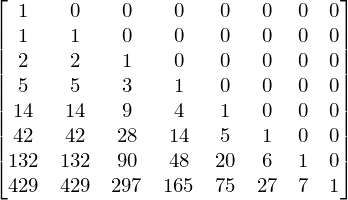

In [72]:
(X_C.rhs*X_P.rhs**(-1)*P*X_P.rhs*X_C.rhs**(-1)).applyfunc(simplify)

In [64]:
(X_S2.rhs*X_P.rhs**(-1)*P*X_P.rhs*X_S2.rhs**(-1)).applyfunc(simplify)

ValueError: Matrix det == 0; not invertible.

In [57]:
X_CP = (X_C.rhs*X_P.rhs**(-1)).applyfunc(simplify)

In [ ]:
is_ordinary_RA(X_CP), is_exponential_RA(X_CP)

In [66]:
L = Lambda(list(alpha_vector)+list(beta_vector), X_CP)

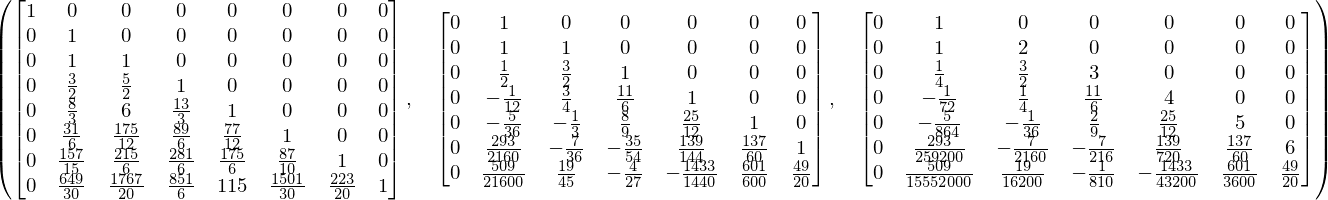

In [71]:
X_CP_v = L(*([1]+[0]*(m-1)+[1]+[0]*(m-1)))
X_CP_v, production_matrix(X_CP_v), production_matrix(X_CP_v, exp=True)

In [72]:
is_ordinary_RA(X_CP_v), is_exponential_RA(X_CP_v)

(False, False)

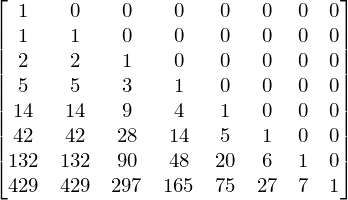

In [70]:
X_CP_v * P * X_CP_v**(-1)

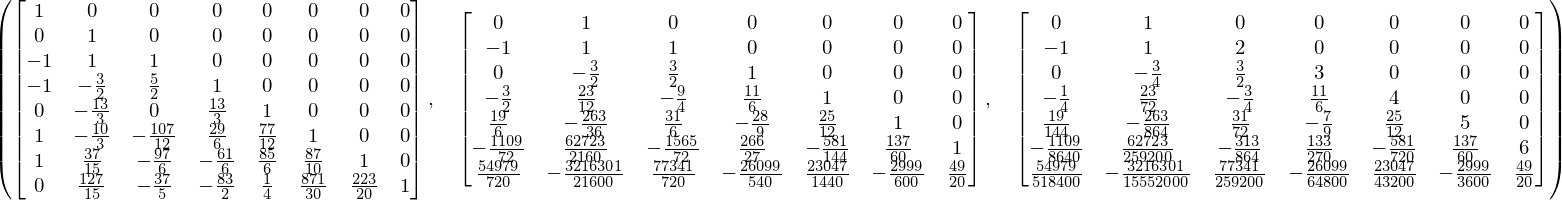

In [75]:
X_CP_v = L(*([x]*(2*m)))
X_CP_v, production_matrix(X_CP_v), production_matrix(X_CP_v, exp=True)

In [77]:
is_ordinary_RA(X_CP_v), is_exponential_RA(X_CP_v)

(False, False)

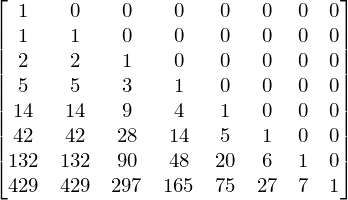

In [78]:
X_CP_v * P * X_CP_v**(-1)

In [ ]:
((X_P.rhs*X_C.rhs**(-1))**(-1)).applyfunc(simplify)

In [ ]:
((X_C.rhs*X_P.rhs**(-1))**(-1)).applyfunc(simplify)